# Windows 10/11 VM Instructions

These instructions are for the assignment using a Virtual Machine. The VM makes it far easier to run on Windows due to everything being set up in a linux environment ahead of time. You can do this with any Virtual Machine of your choice, as long as it supports cloning via VMDK.

# Installing the Virtual Image

These instructions may vary depending on which Virtual Machine you are using, but as an example, I will be using Oracle's VirtualBox VM. If you plan to use the same, you can follow the following steps, otherwise just download the VMDK file via the RAR file from this folder: https://drive.google.com/drive/folders/1ZspD01n9u-WIFMsEWEGu6Sy1BVa_cTk5

# Setting up your virtual machine

First, install Oracle's VirtualBox VM from this link: https://www.virtualbox.org/wiki/Downloads

Then, head to this link and install the RAR file in the google drive: https://drive.google.com/drive/folders/1ZspD01n9u-WIFMsEWEGu6Sy1BVa_cTk5

Once you finished installing the RAR file, extract everything and place it within a folder of your choice.

Once that is done, you can load up VirtualBox. You should come across a screen like this:
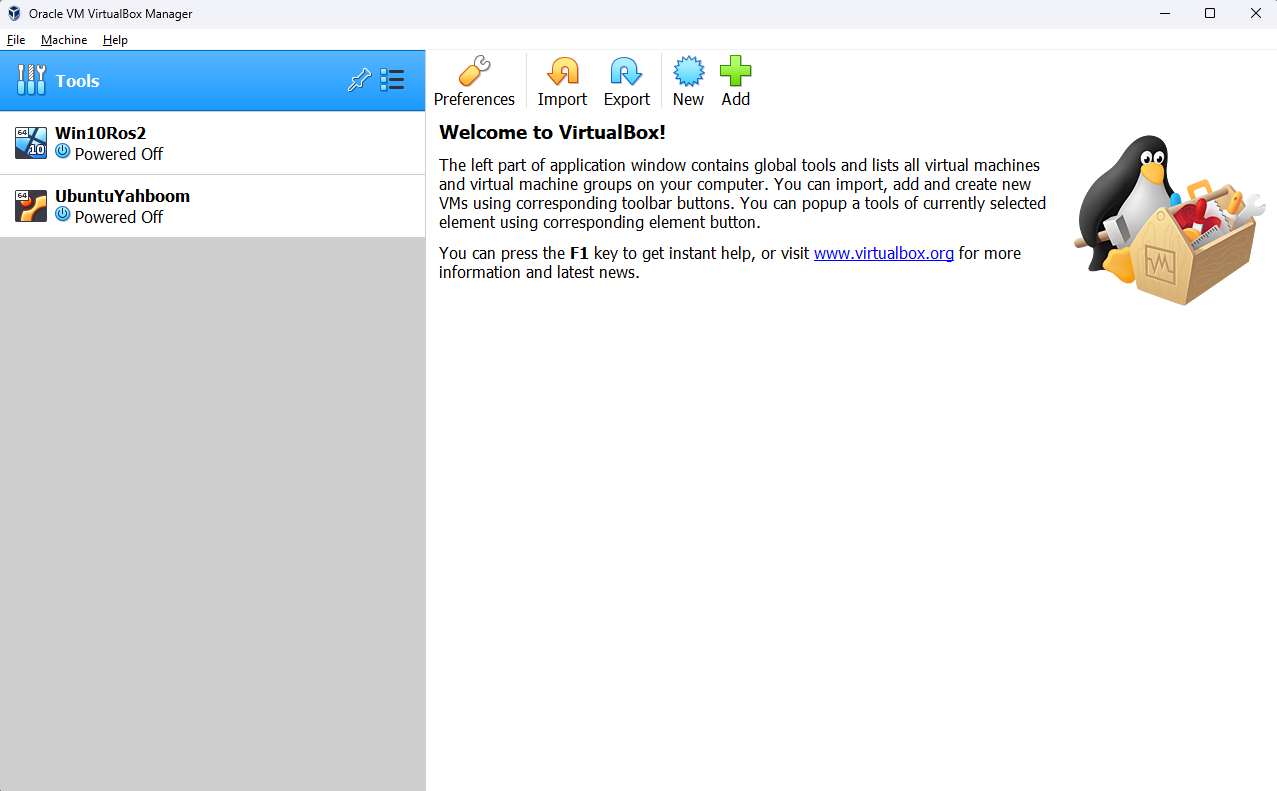

From this screen, you want to select the icon that says "New" at the top of the screen.

Then you are going to create a name for the new virtual machine, in this case, I will name it UbuntuYahboom2.

Select the location to which you want the virtual machine to install. I recommend that whatever drive you use has at least 50-100gb of storage available.

The type should automatically set to Linux and version should automatically be set to Ubuntu 64-bit.

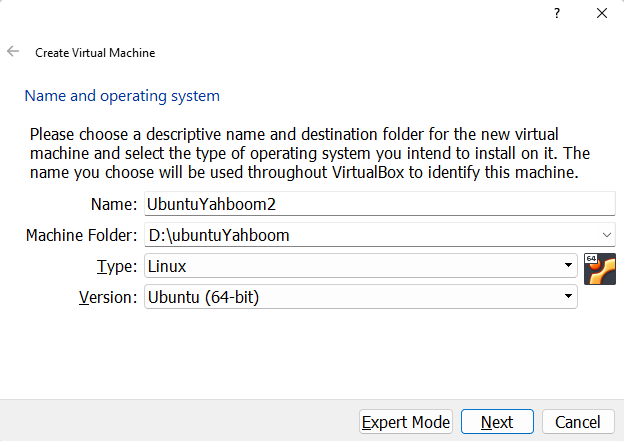

You can now press the `Next` button. The next window that pops up should be the RAM allocation window. I recommend 1/4 to 1/2 of your system's available RAM. The more you allocate, the faster it will run, but allocating too much can impact your system's performance outside the VM. In this case, I have 16gb available, so I will use 4:

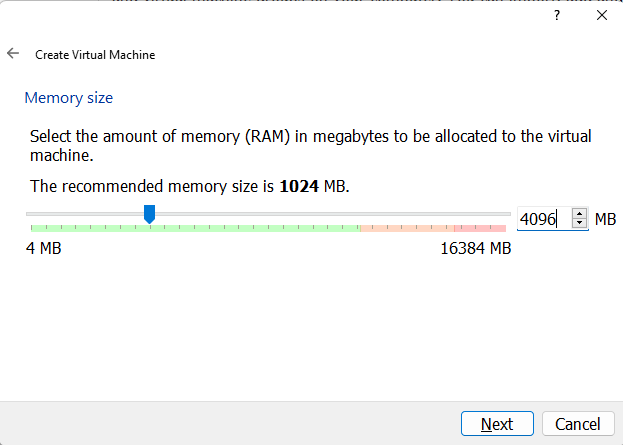

After allocating your desired amount of memory, you can select the `Next` button. What should come up now is the menu for choosing your "Hard Disk." What you want to do is select the option that says `Use an existing virtual hard disk file` and select the little folder icon next to the dropdown:

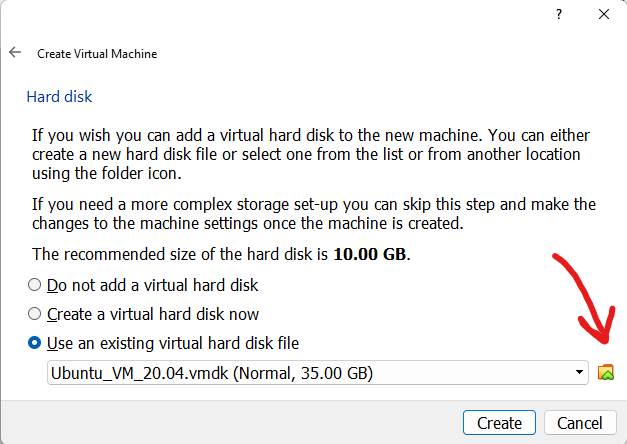

Now you need to navigate to the folder which you extracted the RAR file to.

Once you have selected the file, press the `Create` button at the bottom of the window, and your virtual machine should now be created.

# Starting your VM

To start your Virtual Environment, select the new machine from the left side and press the green `Start` button at the top of the screen.

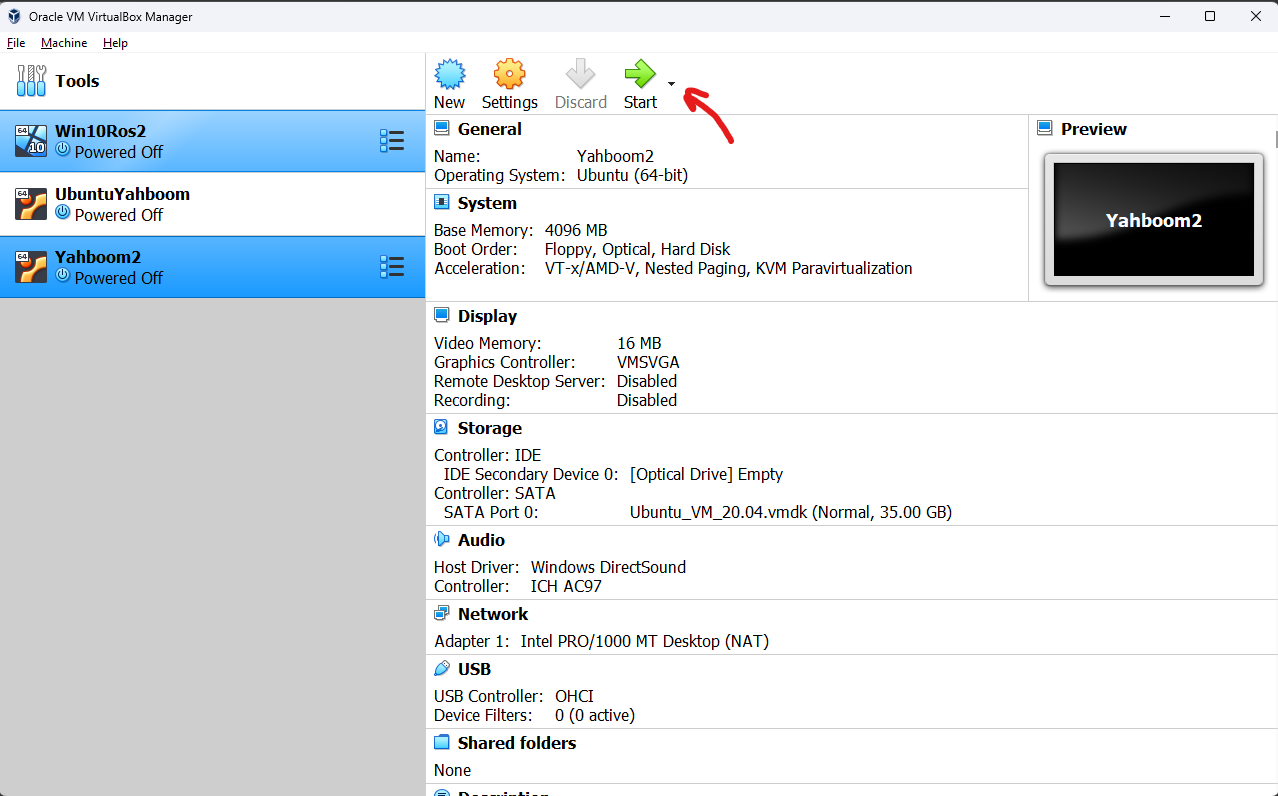

# Common Issues

Upon finishing, your virtual machine may show this error:
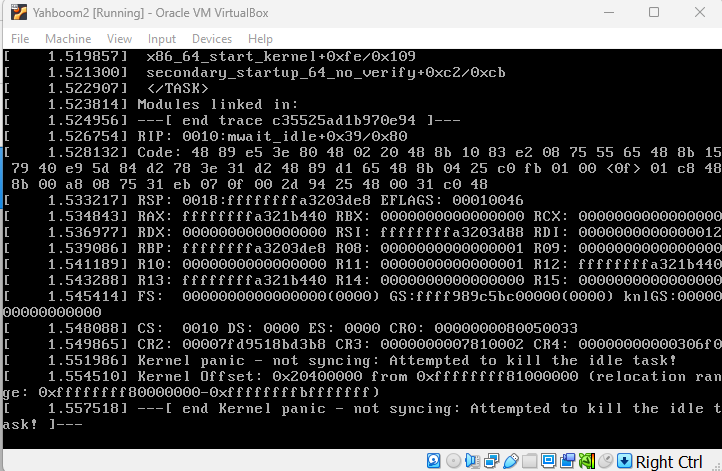

The simple fix to this is to go back to VirtualBox, and within there, select the button at the top that says `Settings` and within that menu, select the `System` tab on the left side, and then select the `Processor` tab at the top. Then, set the `Processors` value to any value above 1.
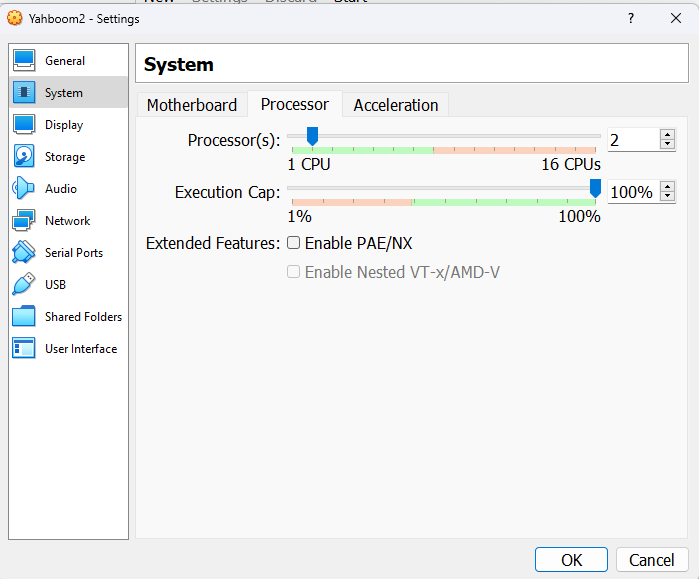

Press `Ok` and start your virtual machine again.

On the first window that pops up, select `Ubuntu` and hit enter.

# Checkpoint 1

Now we will begin progress for checkpoint 1. You should see that the virtual machine resembles a standard Ubuntu machine.

To start, press your Windows key or dedicated system key, and type "terminal" into the search bar. You should see two options come up: `terminal` and `terminator`, select the first one.

You should see something similar to the following window:

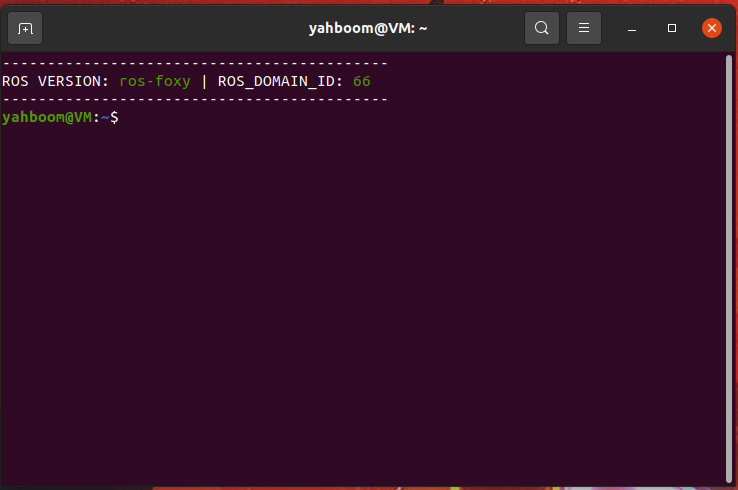

The first step is to navigate to whichever directory you would like to clone the repository to. In this example, it will be my home directory:

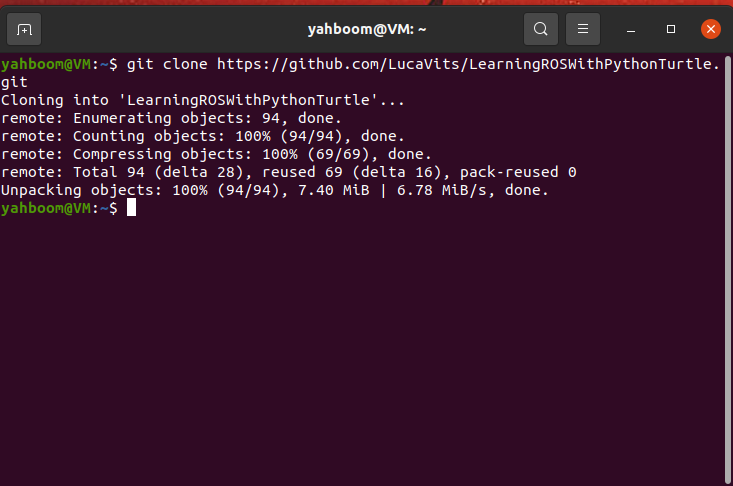

(Note: if you do not clone it into the home directory, every reference to the repository in the future requires you to put your path to your repository in place of the `~`)

Once you have navigated to your repository, enter the command:
```
git clone https://github.com/LucaVits/LearningROSWithPythonTurtle.git
```


# Creating Packages

Navigate back to your main directory by entering the command `cd` and then enter the following commands to create packages:

```
cd ~/LearningROSWithPythonTurtle/ROS2/dev_ws/src
source /opt/ros/foxy/setup.bash
ros2 pkg create --build-type ament_python python_turtle
```
And you should see the following:
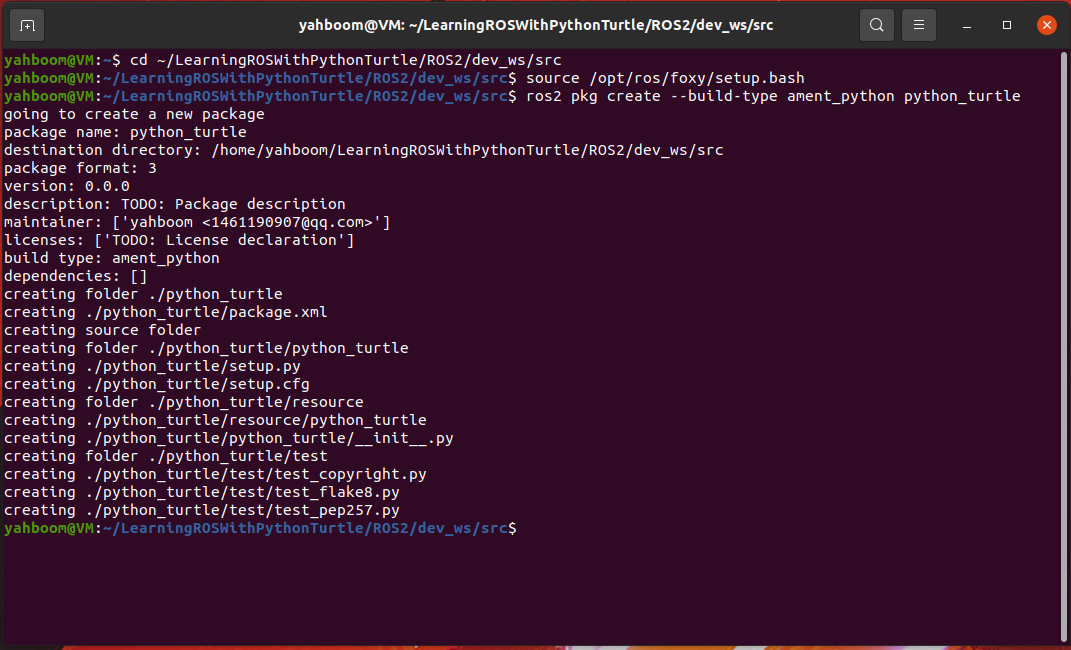

# Messages Types

Next, we need to create our own message type via cmake.

From the same directory as above, enter the following command:
```
ros2 pkg create --build-type ament_cmake turtle_interfaces
```
And you should see the following:
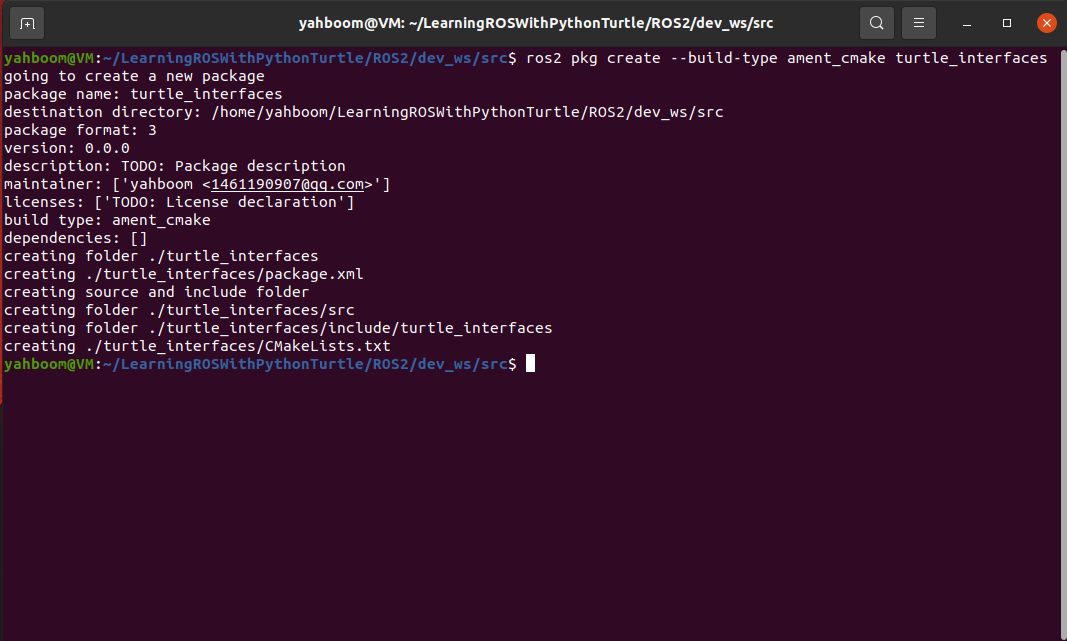

Now you should have a new folder within `src` called `turtle_interfaces`. You can check this by typing `ls` into your command line. Navigate to this folder using the following command:

```
cd turtle_interfaces/
```
Within this folder, you are going to want to edit the text file. You can use your text editor of your choice, in this case I will use vi by entering the following command:
```
vi package.xml
```
and you should see the following:
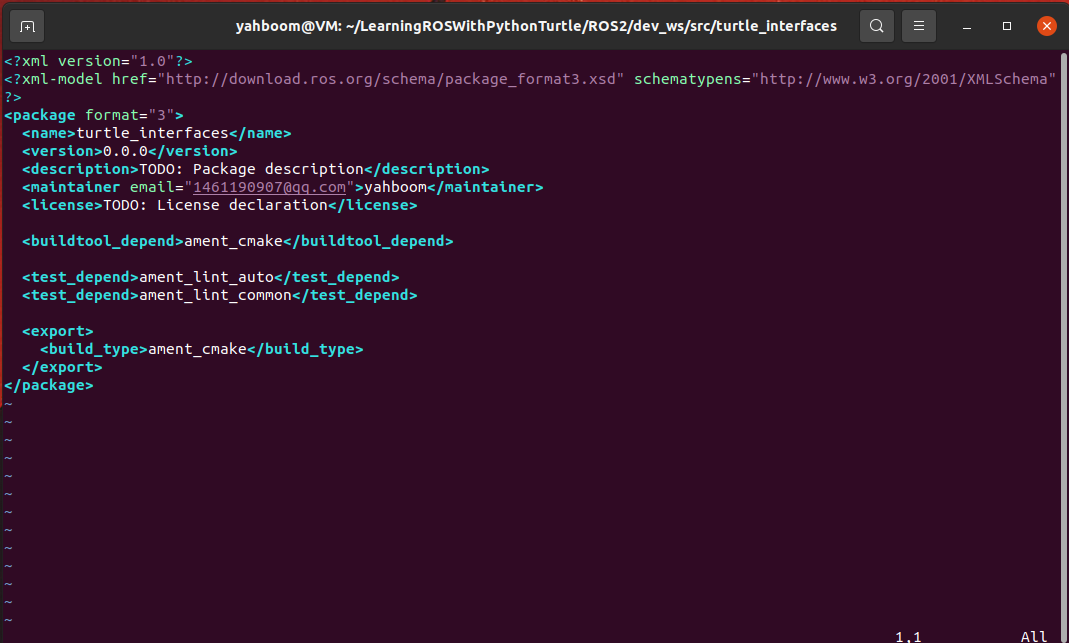

The first thing you want to do is press the `i` key on your keyboard. This will put you in "insert" mode, and it should say `-- INSERT --` at the bottom of the window. Navigate down to the first line that says `<export>` and enter the following above it:

```
<build_depend>rosidl_default_generators</build_depend>
<depend>geometry_msgs</depend>

<exec_depend>rosidl_default_runtime</exec_depend>

<member_of_group>rosidl_interface_packages</member_of_group>
```
and it should now look like this:
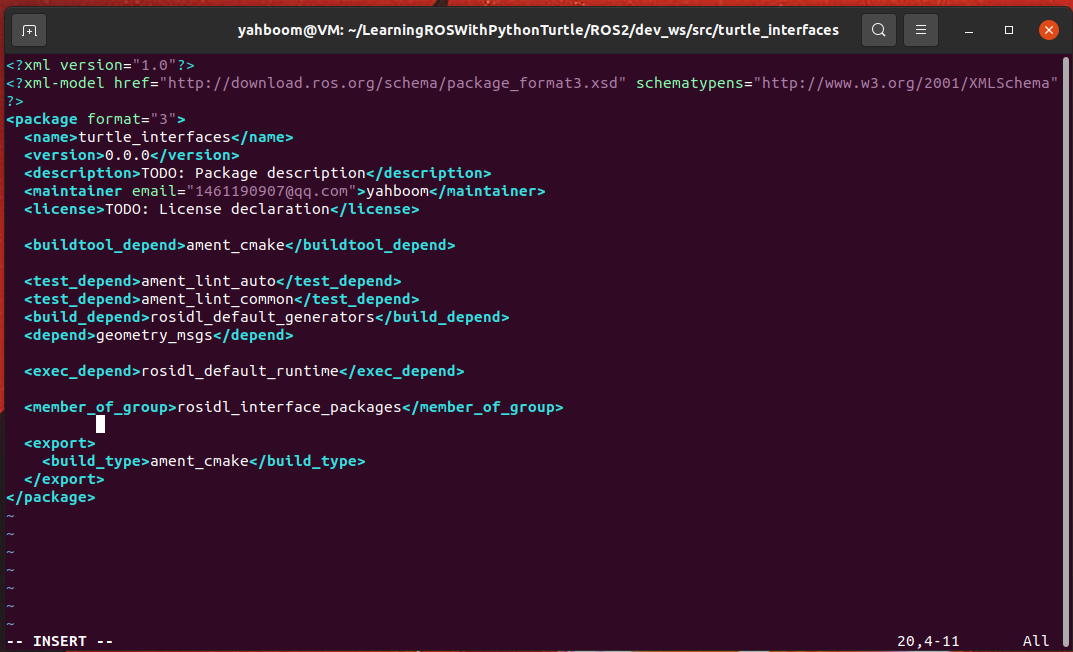

To exit and save your edits, press the `esc` key on your keyboard, and enter type `:wq`. You should see this pop up on the bottom of the screen where the `-- INSERT --` was. Hit `Enter` and it should save the file.

Now, back in the command line, we are going to do something similar with `CMakeLists.txt`.

Type into your command line:
```
vi CMakeLists.txt
```

and navigate to the line that at the bottom which says `ament_package()`.

Once again, press `i` to go into insert mode, and enter the following lines above `ament_package()`:
```
find_package(geometry_msgs REQUIRED)
find_package(rosidl_default_generators REQUIRED)

rosidl_generate_interfaces(${PROJECT_NAME}
  "msg/Turtlemsg.msg"
  "srv/Setpose.srv"
  "srv/Setcolor.srv"
  DEPENDENCIES geometry_msgs
)
```

And it should look as follows:
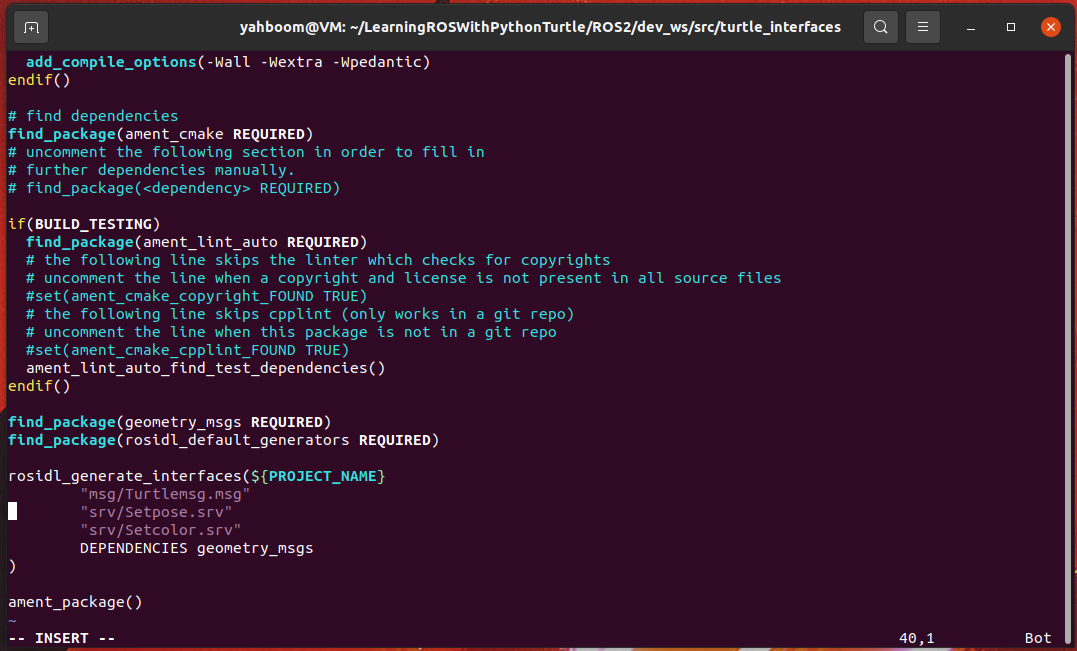

Once again, you are going to hit `esc`, and enter `:wq` to write and quit.

The next step is to make a new folder within the `turtle_interfaces` directory called `msg`, and within that, create a new file called `Turtlemsg.msg`. In order to do this, you can enter the following commands:
```
mkdir msg
cd msg
cat > Turtlemsg.msg
```

The system should now prompt you for an input. Type the following lines, and press `ctrl+D` once you are done:
```
string name
geometry_msgs/Pose turtle_pose
string color
```

and it should look like this:
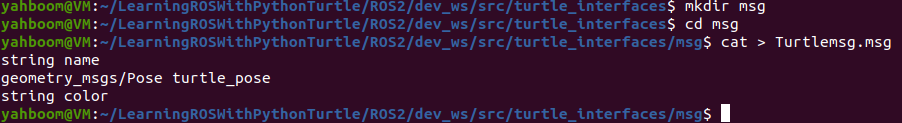

(Note: you might have to press `ctrl+D` twice to get it to save)

# Service Type

Navigate back to your `turtle_interfaces` folder by typing the command: `cd ..`

We will now be making a new folder and two new files.
First enter the commands:
```
mkdir srv
cd srv
cat > Setpose.srv
```
and when prompted for input, input the following:
```
geometry_msgs/PoseStamped turtle_pose
---
int8 ret
```
and once again, press `ctrl+D` to save.
Then enter the following command:
```
cat > SetColor.srv
```
and when prompted, input the following:
```
string color
---
int8 ret
```
and press `ctrl+D` to save the file.

# Building the workspace

Navigate back to the dev_ws directory by typing:
```
cd ../../../
```
and you should be back in the `/dev_ws/` directory.

You are now going to type the command:
```
colcon build
```
And you should see the following:

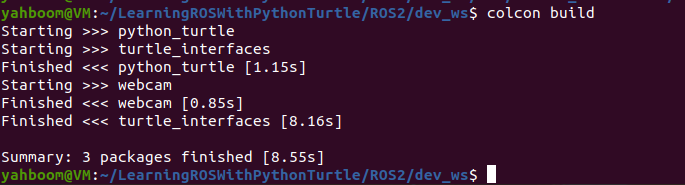

#WARNING
The `colcon build` step is ***the most commonly failed step***, if you encounter any issues at all with `colcon build` the recommended solution is to **delete the repository from your files, clone again and start over from checkpoint 1.**

From this point on, every time you open a new terminal and you want to use packages in the workspace, you have to set up the workspace using the following command:
```
source ~/LearningROSWithPythonTurtle/ROS2/dev_ws/install/setup.bash
```

Alternatively, on Ubuntu it is possible to use a command to automatically open the bash script every time a new terminal is open with the following command:
```
echo 'source ~/LearningROSWithPythonTurtle/ROS2/dev_ws/install/setup.bash' >> ~/.bashrc
```

To confirm your packages are working correctly, enter the following commands:
```
source ~/LearningROSWithPythonTurtle/ROS2/dev_ws/install/setup.bash
ros2 interface show turtle_interfaces/msg/Turtlemsg
ros2 interface show turtle_interfaces/srv/Setpose
ros2 interface show turtle_interfaces/srv/Setcolor
```
and if you see something like the following, you have successfully completed Checkpoint 1:

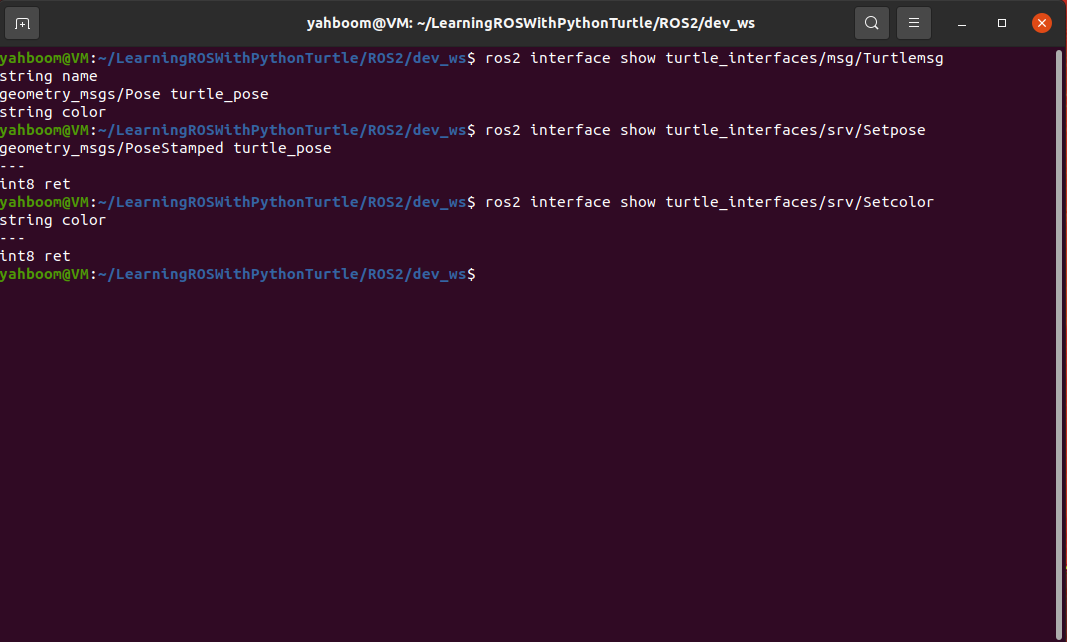

# Set up your webcam for your VM

If you are using Virtual Box VM, you'll likely have to set up your webcam to work with the virtual machine in the settings.

First, find the specific version for the Virtual Box Extension Pack online. If you are using the most recent version of Virtual Box, the download is available on the website: [Download](https://www.virtualbox.org/wiki/Downloads)

Otherwise, you may have to search online.

After enabling the extension pack, fully close your Virtual Machine and reopen it. You should see a new option at the top of the screen under "Devices" that says "Webcam." Select that option, and select your webcam from the list.

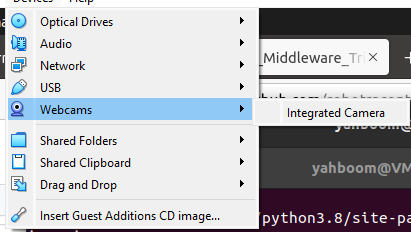

# Checkpoint 2

In 3 separate terminals, run the command to set up your workspace:
```
Add command
```

In your first terminal, run the command:
```
ros2 run webcam webcam_pub
```

In your second terminal, run the command:
```
ros2 run webcam webcam_sub
```

You should now be able to see an image of your webcam appear on screen.

In your third terminal, if you run the command:
```
ros2 topic hz image_raw
```
You should see the following image:

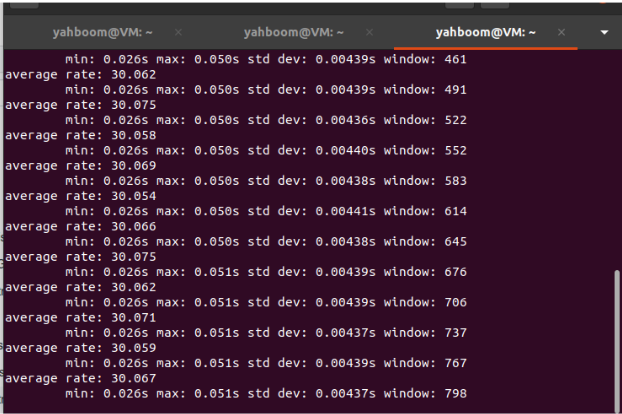

And if you run:
```
ros2 topic echo image_raw
```

You should see

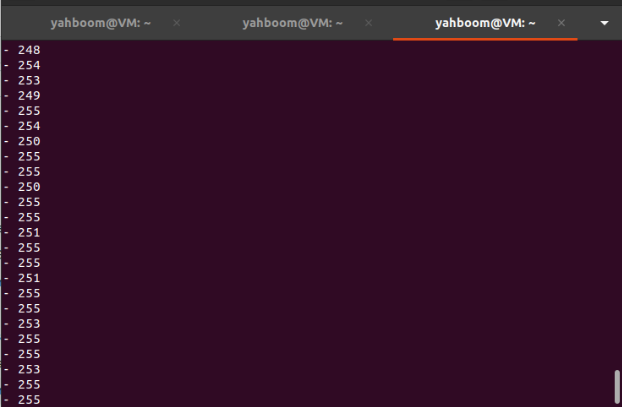

If everything above is correct, then you have successfully reached the end of checkpoint 2!